In [1]:
# Import data and modules
import pandas as pd
import numpy as np
from sklearn import datasets
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

diabetes_data_set = pd.read_csv('pima-indians-diabetes.data.txt')

# # We'll use the petal length and width only for this analysis
y = diabetes_data_set.iloc[:,8].values
X = diabetes_data_set.iloc[:,2:4].values

# Print the unique labels of the dataset
print('\n' + 'The unique labels in this data are ' + str(np.unique(y)))

Populating the interactive namespace from numpy and matplotlib

The unique labels in this data are [0 1]


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))
print()

There are 537 samples in the training set and 231 samples in the test set



In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


/Users/ibm/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


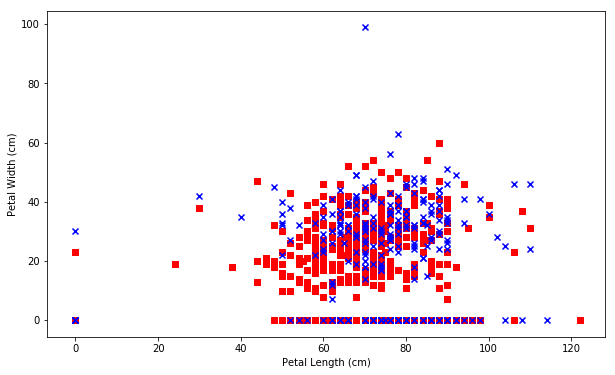

In [4]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

markers = ('s','x','o')
colors = ('red','blue','lightgreen')

cmap = ListedColormap(colors[:len(np.unique(y_test))])
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
for idx,cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl,0],y=X[y==cl,1],
               c=cmap(idx),marker=markers[idx],label=cl)

In [5]:
'''
    This is the bread and butter of this whole notebook. This visualization gives you an inside look at
    the difference of the classification. Which is super powerful!
'''
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # This is plotting the actual of the points inside!
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [6]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train_std, y_train)

print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train_std, y_train)))

print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test_std, y_test)))

The accuracy of the svm classifier on training data is 0.64 out of 1
The accuracy of the svm classifier on test data is 0.68 out of 1


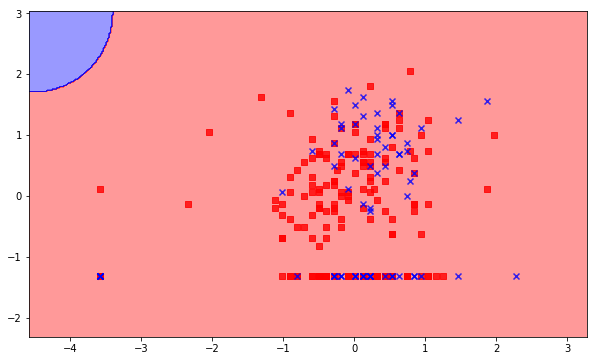

In [7]:
plot_decision_regions(X_test_std, y_test, svm)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(X_train_std, y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(X_test_std, y_test)))

The accuracy of the knn classifier is 0.71 out of 1 on training data
The accuracy of the knn classifier is 0.63 out of 1 on test data


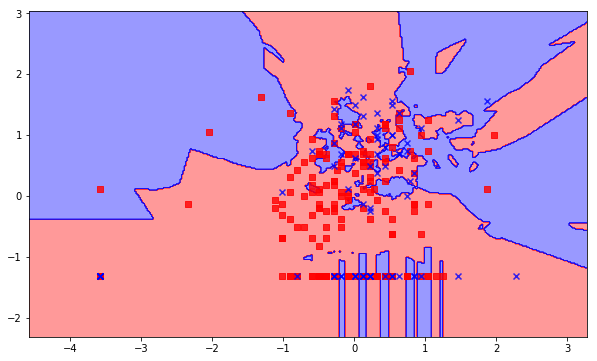

In [9]:
plot_decision_regions(X_test_std, y_test, knn)

In [10]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train_std, y_train)

print('The accuracy of the xgb classifier is {:.2f} out of 1 on training data'.format(xgb_clf.score(X_train_std, y_train)))
print('The accuracy of the xgb classifier is {:.2f} out of 1 on test data'.format(xgb_clf.score(X_test_std, y_test)))

The accuracy of the xgb classifier is 0.70 out of 1 on training data
The accuracy of the xgb classifier is 0.67 out of 1 on test data


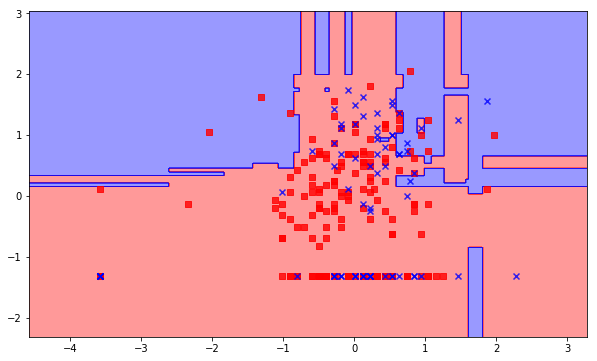

In [11]:
plot_decision_regions(X_test_std, y_test, xgb_clf)

In [12]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train_std, y_train)

print('The accuracy of the Logistic Regressor is {:.2f} out of 1 on training data'.format(logit.score(X_train_std, y_train)))
print('The accuracy of the Logistic Regressor is {:.2f} out of 1 on test data'.format(logit.score(X_test_std, y_test)))

The accuracy of the Logistic Regressor is 0.64 out of 1 on training data
The accuracy of the Logistic Regressor is 0.68 out of 1 on test data


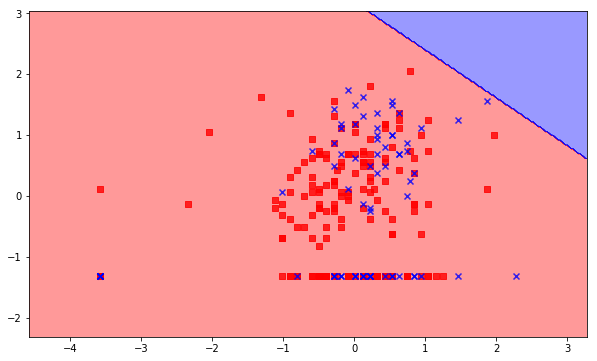

In [13]:
plot_decision_regions(X_test_std, y_test, logit)

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train_std, y_train)

print('The accuracy of the Decision Tree is {:.2f} out of 1 on training data'.format(tree.score(X_train_std, y_train)))
print('The accuracy of the Decision Tree is {:.2f} out of 1 on test data'.format(tree.score(X_test_std, y_test)))

The accuracy of the Decision Tree is 0.86 out of 1 on training data
The accuracy of the Decision Tree is 0.64 out of 1 on test data


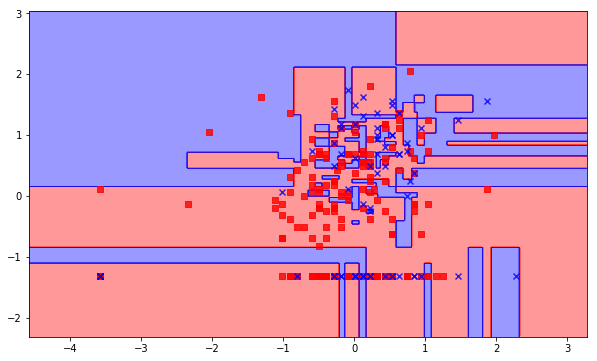

In [15]:
plot_decision_regions(X_test_std, y_test, tree)